# Pre-Exercises

In [1]:
# importing matplotlib.pyplot allows us to generate graphs
import matplotlib.pyplot as plt

import random as rd
import numpy as np

Create the class `Fungus`, similar to how we created Persons in the lecture script. Fungi have a position (x and y each randomly between 0 and 10) and a method to draw them. Create 100 fungi and have them drawn (same as in the lecture script).

Look for the fungus that grows most pointedly on the bottom left. To do this, you need to walk over all the fungi in a loop in the main program. The fungus at the bottom left has a minimum in the following property: `((self.x)**2+(self.y)**2)**0.5`

Look for the fungus that grows furthest to the upper right. It has a maximum in the property `((self.x)**2+(self.y)**2)**0.5`

Look for the fungus that grows closest to the center of the forest (= position 5/5). It has a minimum in the property `((self.x - 5)**2+(self.y - 5)**2)**0.5`

Search for the fungus that grows closest to the first fungus that was created. The first fungus is at position 0 of the list where all fungi are. So the distance to this point should be minimal, but not 0 (otherwise it would be the first fungus itself). The distance to this fungus can be calculated similarly to the distance to the point 5/5.

1 2
10 6
7 7
First and next:
1 2
2 1


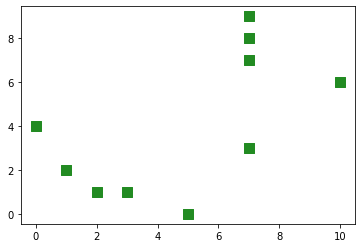

In [2]:
class Fungus:
    def __init__(self):
        self.x = rd.randint(0,10)
        self.y = rd.randint(0,10)
        
    def draw(self):
        plt.scatter(self.x, self.y, s = 100, marker = "s", c = "forestgreen")
        
    def absdistance(self, x0, y0):
        return np.sqrt((self.x-x0)**2 + (self.y-y0)**2)
        
    def abspos(self):
        return self.absdistance(0,0)
        
fungi = [Fungus() for _ in range(10)]

for fungus in fungi:
    fungus.draw()
    
fung_min = fungi[0]
for fungus in fungi:
    if fungus.abspos() < fung_min.abspos():
        fung_min = fungus
        
print(fung_min.x, fung_min.y)

fung_max = fungi[0]
for fungus in fungi:
    if fungus.abspos() > fung_max.abspos():
        fung_max = fungus
        
print(fung_max.x, fung_max.y)

    
fung_cntrl = fungi[0]
for fungus in fungi:
    if fungus.absdistance(5,5) < fung_cntrl.absdistance(5,5):
        fung_cntrl = fungus
        
print(fung_cntrl.x, fung_cntrl.y)

    
fung_fst = fungi[0]
fung_mind = fungi[0]
for fungus in fungi:
    if fung_mind.absdistance(fung_fst.x, fung_fst.y) == 0:
        fung_mind = fungus
    if fungus.absdistance(fung_fst.x, fung_fst.y) == 0:
        continue
    elif fungus.absdistance(fung_fst.x, fung_fst.y) < fung_mind.absdistance(fung_fst.x, fung_fst.y):
        fung_mind = fungus
    
print("First and next:")
print(fung_fst.x, fung_fst.y)
print(fung_mind.x, fung_mind.y)

# Exercise

Create a forest by creating the class `Tree` and generating a list of 100 such trees. Trees have an x-position (randomly between 0 and 10) and a y-position (randomly between 0 and 10). Trees also have a size: with a 50% chance, a small tree should be created (size = 10 plus/minus 0.1 (i.e., Gaussian distributed)), otherwise a large tree (size = 100 plus/minus 2).

The class Tree should also have a method in which the tree is drawn at the correct position and size.

Then look for tree twins in a function. Tree twins are 2 trees that are both larger than 50 and whose distance is smaller than 0.5. Draw connecting lines between all tree twins.

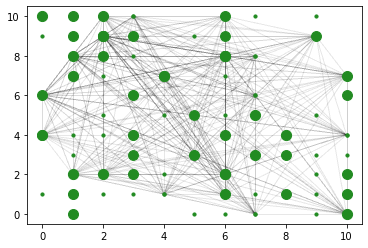

In [3]:
class Tree:
    def __init__(self):
        self.x = rd.randint(0,10)
        self.y = rd.randint(0,10)
        
        small = rd.random()
        if small < 0.5: # small tree
            self.size = rd.gauss(10, 0.1)
        else: # large tree
            self.size = rd.gauss(100, 2)
            
    def draw(self):
        plt.scatter(self.x, self.y, s = self.size, marker = "o", c = "forestgreen", zorder=1)
        
    def big(self):
        return self.size > 50
        
    def dist(self, other):
        return np.sqrt((self.x-other.x)**2 + (self.y-other.y)**2)
    
    def draw_conns(self, others):
        for other in others:
            plt.plot((self.x, other.x), (self.y, other.y), c = "black", alpha = 0.01, lw = 1, zorder=0)
        
    def is_twin(self, forest):
        return self.big and any(tr.big and tr is not self and self.dist(tr) < 0.5 for tr in forest)

        
forest = [Tree() for _ in range(100)]

for tree in forest:
    tree.draw()
    
twins = [t for t in forest if t.is_twin(forest)]

for twin in twins:
    twin.draw_conns(twins)


# Helpful stuff

Reconsider the last part of today's Pre-Exercise. In certain cases there certainly could be two distinct fungi at the same position. The description disregards such cases on purpose, of course, as to not complicate the matter. But what if we wanted to know if a fungus merely grows at the same spot or is actually the very same fungus as another?

In other words: How do we compare objects for (in-)equality and identity?

In [4]:
class A:
    pass
a = A()
id(a)

140557351781856

As we can see, even an object of a completely empty class `A` has an identity. This identity can be queried using the `id` function.

In [5]:
b = A()
id(b)

140557351782384

Another object of the same class does not have the same `id`. So surely they are not the same:

In [6]:
b is a

False

But what about objects that can be equal while they are not the same?

Consider the class `Circle` which has a radius. Two circles are equal if the have the same radius.

In [7]:
class Circle:
    def __init__(self, radius):
        self.radius = radius
        
c1 = Circle(1)
c2 = Circle(1)

If we want to compare for equality, rather than identity, we already have learnt to use `==`.

The following should yield `True` given our reasoning:

In [8]:
c1 == c2

False

What has happened here?

Behind the scenes Python uses identity as equality if we don't tell it otherwise. Here is how we can define our own equality.

It works very similar to how we defined our `distance` method above:

In [9]:
class Circle:
    def __init__(self, radius):
        self.radius = radius
        
    def __eq__(self, other):
        return self.radius == other.radius
    
c1 = Circle(1)
c2 = Circle(1)

Now we can distinguish if two circles really **are** the same, or if they merely satisfy our conditions of equality.

This can be especially useful if we want to treat the two circles differently later on.

In [10]:
c1 == c2, c1 is c2

(True, False)

The issue of identity is especially pressing when mutating objects. Lists e.g. are mutable:

In [11]:
l1 = list()
l2 = l1 # assign l1 to l2
l2.append(1)
# appending on l2 also appends on l1 -> They are the same object!
print(l1)
print(l2)

[1]
[1]


It may seem intuitive, that if we say `l1 = l2` we get this result. But this does not if we re-assign rather than mutate. For example with integers:

In [12]:
i = 1
j = i
j += 1
i,j

(1, 2)

or with tuples:

In [13]:
t = (1,2)
u = t
u += (3,)
t,u

((1, 2), (1, 2, 3))

This is why lists being mutable and tuples being immutable is such an important thing to know in Python.

In more obscure use cases like the following, the mutability of lists (and object attributes in Python in general) can catch us off guard:

In [14]:
li = [list()] * 3 # create a list of three empty lists
print(li) # check the result is correct
li[0].append(1) # append `1` to the first list in the super-list
print(li) # what happened?

[[], [], []]
[[1], [1], [1]]
